In [140]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime

## Function to download data from Yahoo:

In [141]:
def download_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    data = np.array(data["Close"].pct_change())
    data = data[~np.isnan(data)]
    return data

In [142]:
start = "2020-01-01"
end = datetime.datetime.today().strftime('%Y-%m-%d')
ticker = "NVDA"

data = download_data(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


Shapiro-Wilk Test:
Statistic: 0.9612, p-value: 0.0000
❌ Reject normality (data not normal)


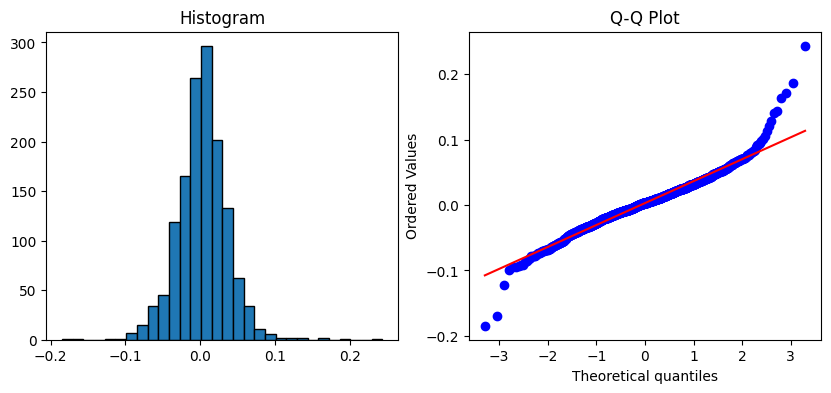

In [143]:
# 1️⃣ Shapiro-Wilk Test (good for small/medium samples)
shapiro_stat, shapiro_p = stats.shapiro(data)
print("Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("✅ Fail to reject normality (data likely normal)")
else:
    print("❌ Reject normality (data not normal)")
    
# 4️⃣ Optional: Plot histogram + QQ plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(data, bins=30, edgecolor='black')
plt.title("Histogram")

plt.subplot(1,2,2)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [144]:
def download_data_log(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    log_returns = np.log(data["Close"] / data["Close"].shift(1))
    data = np.array(log_returns)
    data = data[~np.isnan(data)]
    return data

In [145]:


data = download_data_log(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


Shapiro-Wilk Test:
Statistic: 0.9646, p-value: 0.0000
❌ Reject normality (data not normal)


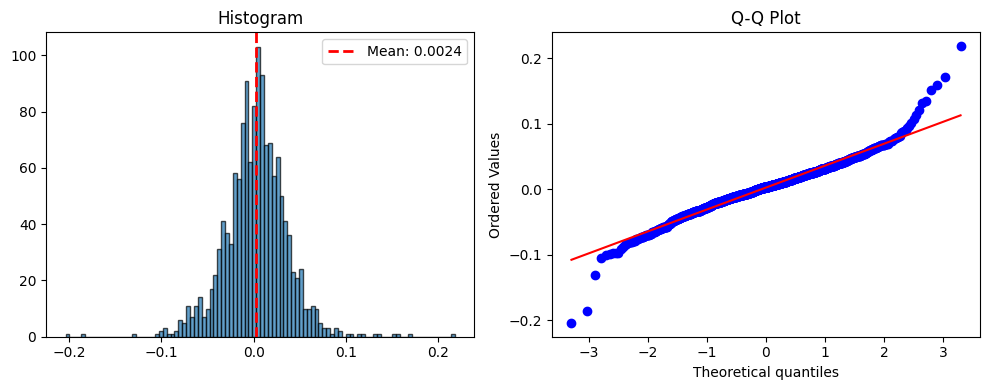

In [146]:
# 1️⃣ Shapiro-Wilk Test (good for small/medium samples)
shapiro_stat, shapiro_p = stats.shapiro(data)
print("Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("✅ Fail to reject normality (data likely normal)")
else:
    print("❌ Reject normality (data not normal)")
    
# Calculate mean
mean_value = np.mean(data)

# Plot
plt.figure(figsize=(10, 4))

# Histogram with mean line
plt.subplot(1, 2, 1)
plt.hist(data, bins=100, edgecolor='black', alpha=0.7)
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_value:.4f}")
plt.title("Histogram")
plt.legend()

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()